In [1]:
import sys
sys.path.insert(0, '..')
from utils import load_npy_image, load_tiff_image
import os
import matplotlib.pyplot as plt
import numpy as np
from preprocess_save_patches_Amazon import mask_no_considered
from skimage.util.shape import view_as_windows
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
root_path = '/media/thimabru/ssd/TCC/imagens_satelite_dataset/227_63'

In [2]:
# Load images --------------------------------------------------------------
img_t1_path = 'imagens/clipped_raster_2018_227_63.tif'
img_t2_path = 'imagens/clipped_raster_2019_227_63.tif'
img_t1 = load_tiff_image(os.path.join(root_path, img_t1_path))
print(type(img_t1))
img_t2 = load_tiff_image(os.path.join(root_path, img_t2_path))
print(img_t1.shape)
print(img_t2.shape)

/media/thimabru/ssd/TCC/imagens_satelite_dataset/227_63/imagens/clipped_raster_2018_227_63.tif
<class 'numpy.ndarray'>
/media/thimabru/ssd/TCC/imagens_satelite_dataset/227_63/imagens/clipped_raster_2019_227_63.tif
(7, 6143, 6702)
(7, 6143, 6702)


In [3]:
# Convert shape from C x H x W --> H x W x C
# Convert from float32 to uint8
img_t1 = img_t1.transpose((1, 2, 0))
img_t2 = img_t2.transpose((1, 2, 0))
input_image = np.concatenate((img_t1, img_t2), axis=-1)
# img_train_normalized = normalization(img_train)
print('Image 7 bands')
print(img_t1.shape)
print(img_t1.dtype)
print(img_t2.shape)
print(img_t2.dtype)
print(input_image.shape)
print(input_image.dtype)
print(img_t1.min(), img_t1.max())

Image 7 bands
(6143, 6702, 7)
uint16
(6143, 6702, 7)
uint16
(6143, 6702, 14)
uint16
0 48010


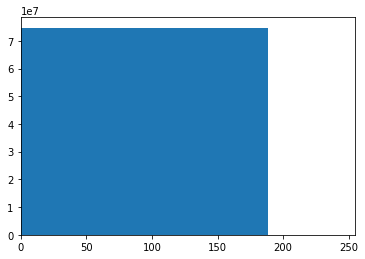

In [4]:
# calculate mean value from RGB channels and flatten to 1D array
vals = img_t1.flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

In [7]:
def normalization(image, norm_type = 1):
    '''Normalization of data. 1->StandardScaler, 2->MinMaxScaler, 3->MinMaxScaler'''
    image_reshaped = image.reshape((image.shape[0]*image.shape[1]),image.shape[2])
    if (norm_type == 1):
      scaler = StandardScaler()
    if (norm_type == 2):
      scaler = MinMaxScaler(feature_range=(0,1))
    if (norm_type == 3):
      scaler = MinMaxScaler(feature_range=(-1,1))
    scaler = scaler.fit(image_reshaped)
    image_normalized = scaler.fit_transform(image_reshaped)
    image_normalized1 = image_normalized.reshape(image.shape[0],image.shape[1],image.shape[2])
    return image_normalized1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0 1.0000000000000002


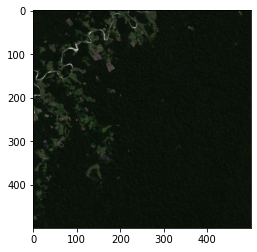

In [14]:
temp = img_t1[2500:3000,2500:3000,:]
rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
rgb[:,:,0] = temp[:,:,3]
rgb[:,:,1] = temp[:,:,2]
rgb[:,:,2] = temp[:,:,1]
rgb = normalization(rgb, norm_type = 2)
print(rgb.min(), rgb.max())
plt.imshow(rgb)

In [4]:
img_t1_bgr = img_t1[:, :, 1:4].astype(np.uint8)
img_t1_rgb = img_t1_bgr[:, :, ::-1]
print(img_t1_rgb.min(), img_t1_rgb.max())

0 255


0.0 29582.0


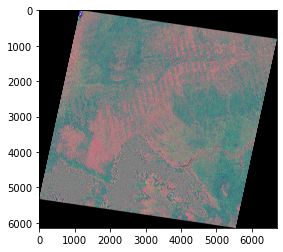

In [6]:
shape = img_t1.shape
img_nir = np.zeros((shape[0], shape[1], 3))
img_nir[:, :, 0] = img_t1[:, :, 4]
img_nir[:, :, 1] = img_t1[:, :, 2]
img_nir[:, :, 2] = img_t1[:, :, 1]
print(img_nir.min(), img_nir.max())
plt.imshow(img_nir.astype(np.uint8))

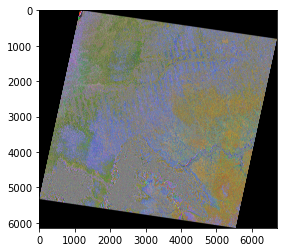

In [6]:
plt.imshow(img_t1_rgb)

In [7]:
array_sum = np.sum(img_t1_rgb)
array_has_nan = np.isnan(array_sum)

print(array_has_nan)

False


In [10]:
img_t2_bgr = img_t2[:, :, 1:4].astype(np.uint8)
img_t2_rgb = img_t2_bgr[:, :, ::-1]

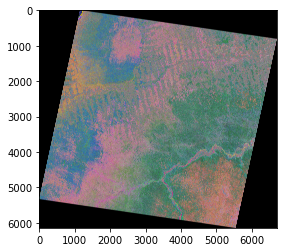

In [11]:
plt.imshow(img_t2_bgr)

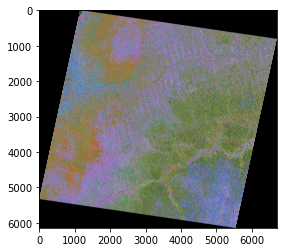

In [13]:
img_t1_ = input_image[:, :, 7:].astype(np.float32)
img_t1_ = img_t1_[:, :, 1:4].astype(np.uint8)
img_t1_ = img_t1_[:, :, ::-1]
plt.imshow(img_t1_)

In [6]:
img_mask_ref_path = 'mask_ref.npy'
img_mask_ref = load_npy_image(os.path.join(root_path, img_mask_ref_path)).astype(np.float32)
img_mask_ref = img_mask_ref[:6100, :6600]
print(f"Mask area reference shape: {img_mask_ref.shape}")
unique, counts = np.unique(img_mask_ref, return_counts=True)
counts_dict = dict(zip(unique, counts))
print(f'Class pixels of final mask: {counts_dict}')

../DATASETS/Amazon_npy/mask_ref.npy
Mask area reference shape: (6100, 6600)
Class pixels of final mask: {-99.0: 10368203, -1.0: 29891797}


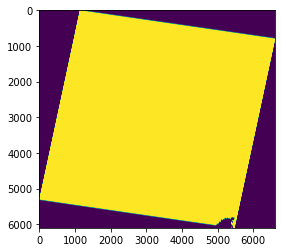

In [5]:
plt.imshow(img_mask_ref)

In [6]:
new_mask = np.zeros((6100, 6600, 3))

In [7]:
new_mask[img_mask_ref==-99] = np.array([0, 0, 0])
new_mask[img_mask_ref==-1] = np.array([255, 255, 255])

In [8]:
unique, counts = np.unique(new_mask, return_counts=True)
counts_dict = dict(zip(unique, counts))
print(f'Class pixels of final mask: {counts_dict}')

Class pixels of final mask: {0.0: 31104609, 255.0: 89675391}


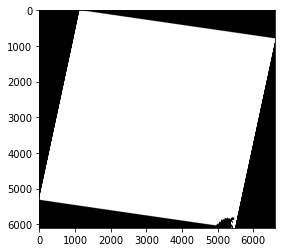

In [9]:
plt.imshow(new_mask.astype(np.uint8))

In [8]:
'''
    0 --> No deforastation
    1 --> Deforastation
'''
image_ref_path = 'labels/ref_2019.tif'
image_ref = load_tiff_image(os.path.join(root_path, image_ref_path))
# Clip to fit tiles of your specific image
# image_ref = image_ref[:6100, :6600]
# image_ref[img_mask_ref == -99] = -1
print(f"Image reference shape: {image_ref.shape}")

unique, counts = np.unique(image_ref, return_counts=True)
counts_dict = dict(zip(unique, counts))
print(counts_dict)

/media/thimabru/ssd/TCC/imagens_satelite_dataset/227_63/labels/ref_2019.tif
Image reference shape: (6143, 6702)
{0.0: 41002436, 1.0: 167950}


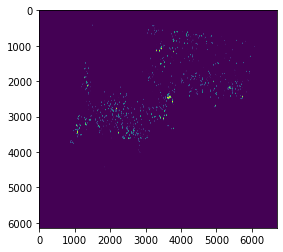

In [9]:
plt.imshow(image_ref)

In [4]:
past_ref1_path = 'labels/ref_1988_2012.tif'
past_ref1 = load_tiff_image(os.path.join(root_path,
                                        past_ref1_path))
past_ref2_path = 'labels/ref_2013_2018.tif'
past_ref2 = load_tiff_image(os.path.join(root_path,
                                        past_ref2_path))
past_ref_sum = past_ref1 + past_ref2
# Clip to fit tiles of your specific image
# past_ref_sum = past_ref_sum[:6100, :6600]
# past_ref_sum[img_mask_ref==-99] = -1
# Doing the sum, there are some pixels with value 2 (Case when both were deforastation).
# past_ref_sum[past_ref_sum == 2] = 1
# Same thing for background area (different from no deforastation)
# past_ref_sum[past_ref_sum==-2] = -1
print(f"Past reference shape: {past_ref_sum.shape}")

/media/thimabru/ssd/TCC/imagens_satelite_dataset/227_63/labels/ref_1988_2012.tif
/media/thimabru/ssd/TCC/imagens_satelite_dataset/227_63/labels/ref_2013_2018.tif
Past reference shape: (6143, 6702)


In [5]:
unique, counts = np.unique(past_ref1, return_counts=True)
counts_dict = dict(zip(unique, counts))
print(counts_dict)

{0.0: 37582584, 1.0: 3587802}


In [6]:
unique, counts = np.unique(past_ref2, return_counts=True)
counts_dict = dict(zip(unique, counts))
print(counts_dict)

{0.0: 41046473, 1.0: 123913}


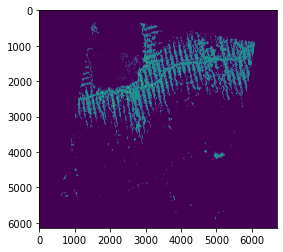

In [7]:
plt.imshow(past_ref_sum)

In [6]:
buffer = 2
final_mask = mask_no_considered(image_ref, buffer, past_ref_sum)

In [7]:
del image_ref, past_ref_sum

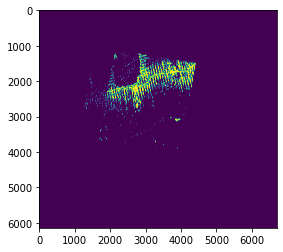

In [23]:
# final_mask[img_mask_ref == -99] = -1
plt.imshow(final_mask)
# final_mask[img_mask_ref == -99] = 0

In [8]:
def extract_patches(image, reference, patch_size, stride):
    window_shape = patch_size
    window_shape_array = (window_shape, window_shape, image.shape[2])
    window_shape_ref = (window_shape, window_shape)
    patches_array = np.array(view_as_windows(image,
                                             window_shape_array, step=stride))

    patches_ref = np.array(view_as_windows(reference,
                                           window_shape_ref, step=stride))

    print('Patches extraidos')
    # print(patches_array.shape)
    num_row, num_col, p, row, col, depth = patches_array.shape

    # print('fazendo reshape')
    #check_memory()
    del image, reference
    #check_memory()
    patches_array = patches_array.reshape(num_row*num_col, row, col, depth)
    # print(patches_array.shape)
    patches_ref = patches_ref.reshape(num_row*num_col, row, col)
    # print(patches_ref.shape)

    return patches_array, patches_ref

In [9]:
patch_size = 128
stride = 128
patches_img, patches_ref = extract_patches(input_image, final_mask, patch_size,
                                            stride)

Patches extraidos


In [10]:
print(len(patches_img))

2444


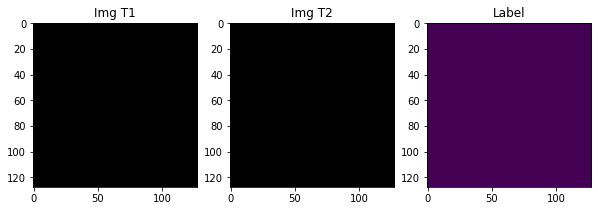

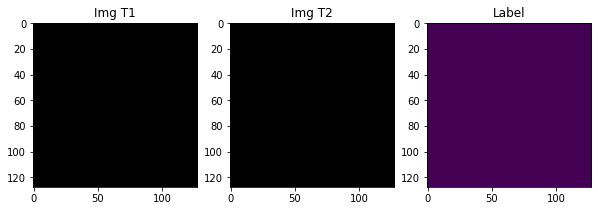

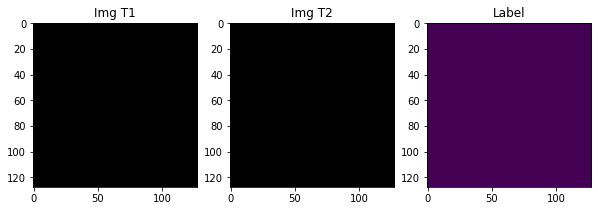

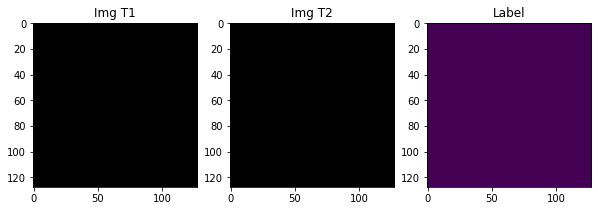

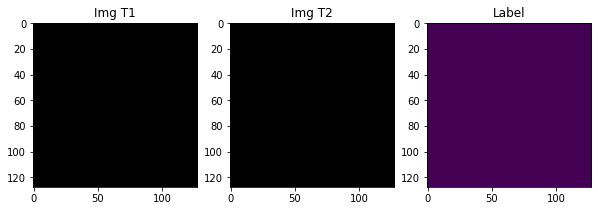

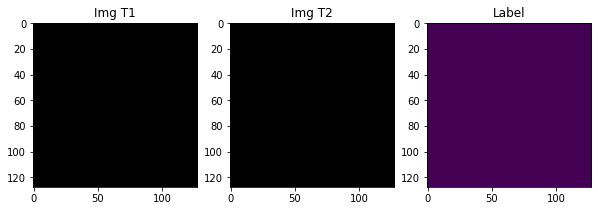

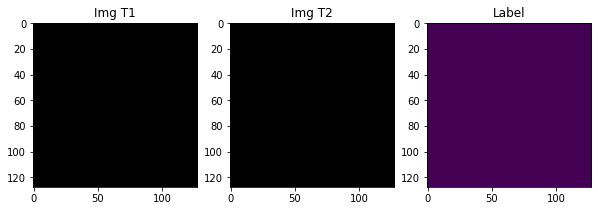

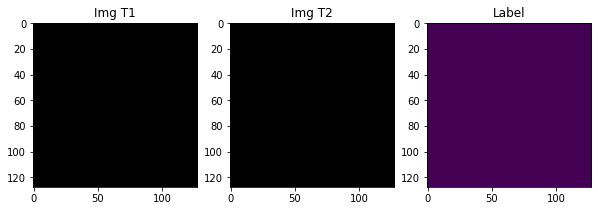

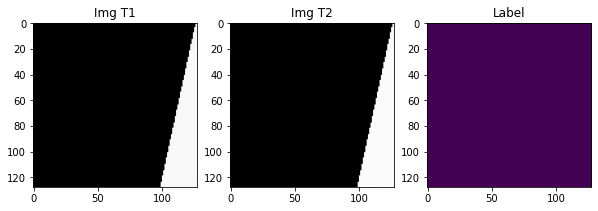

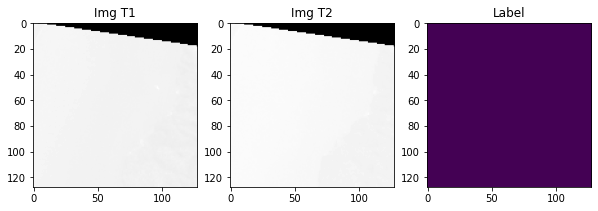

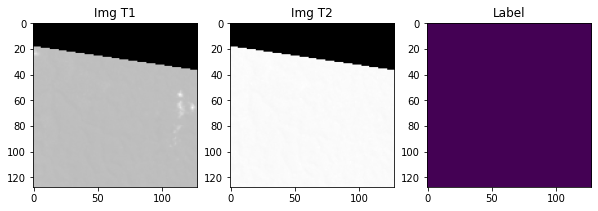

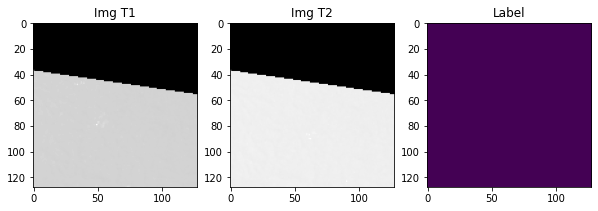

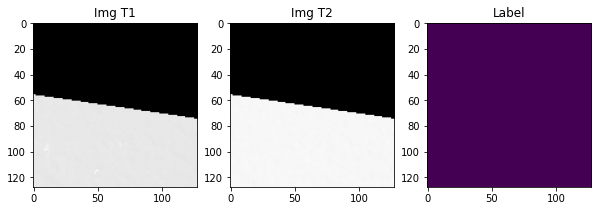

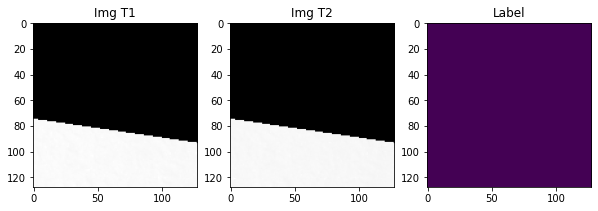

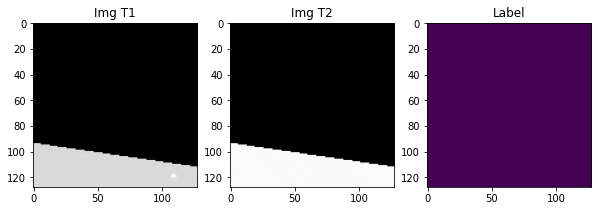

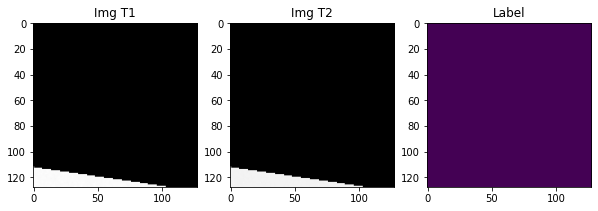

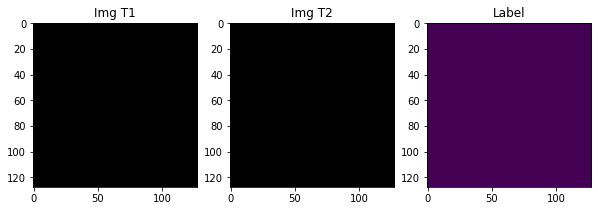

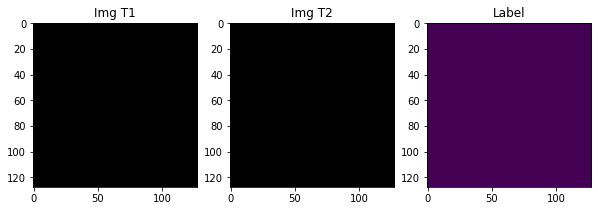

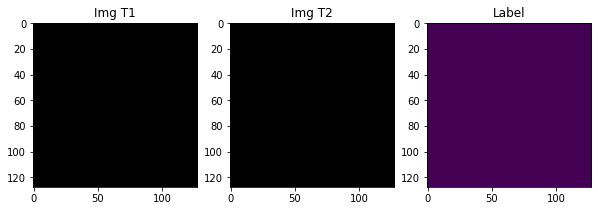

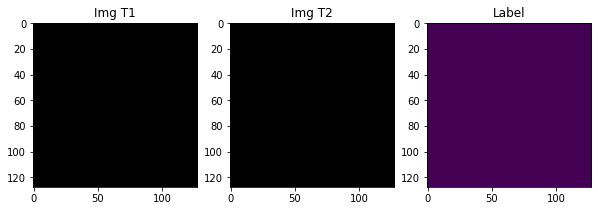

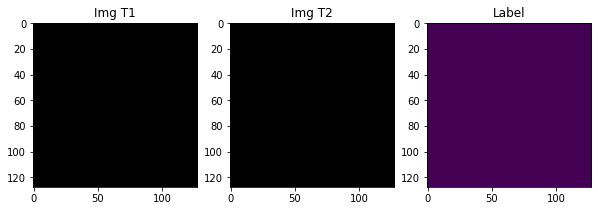

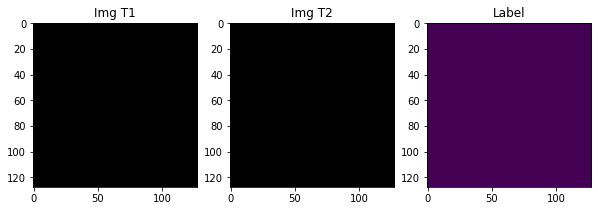

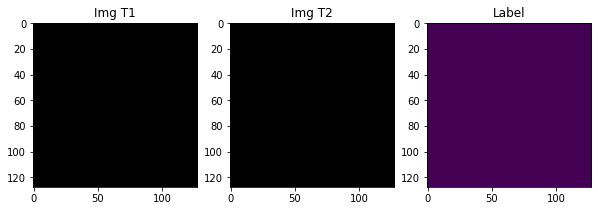

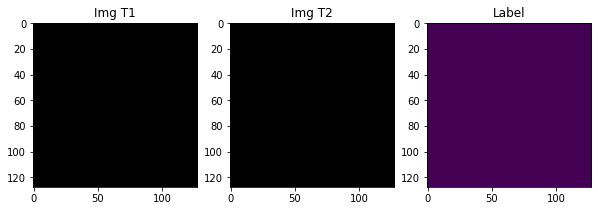

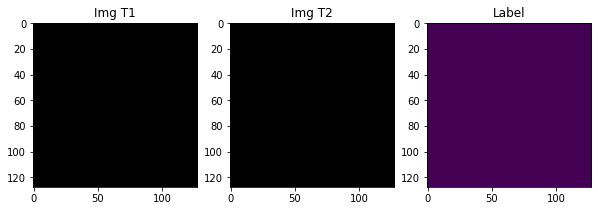

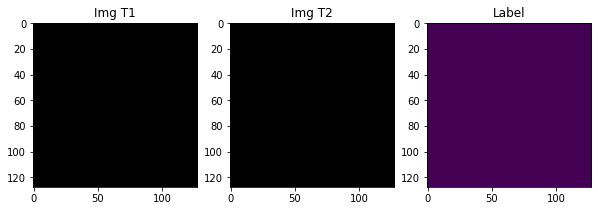

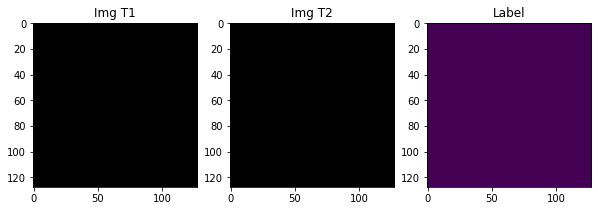

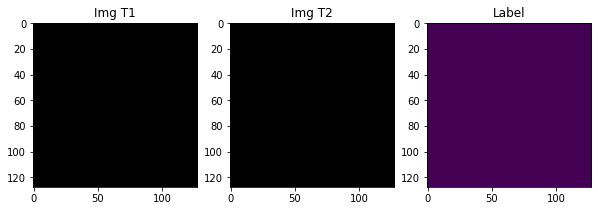

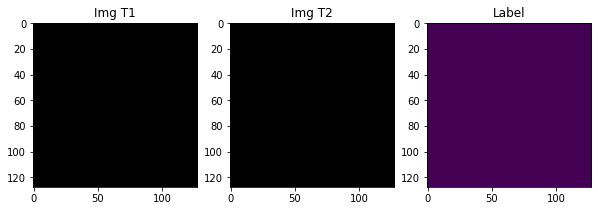

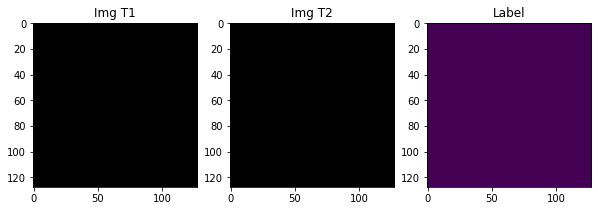

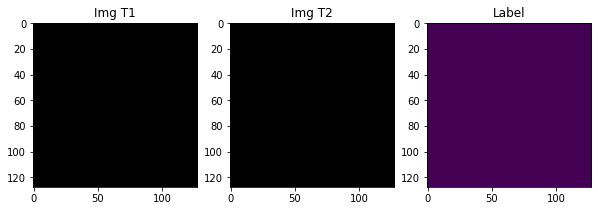

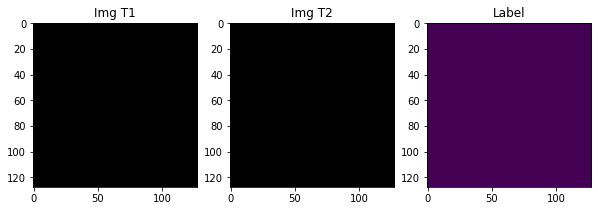

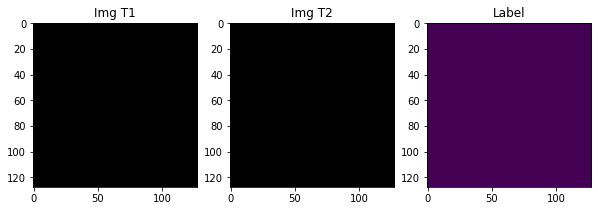

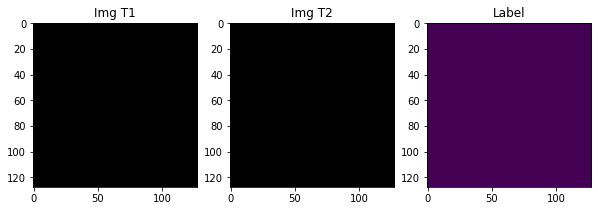

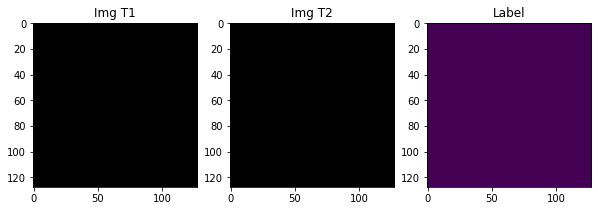

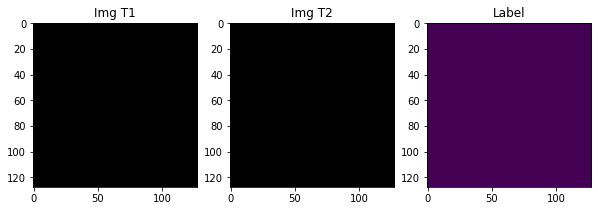

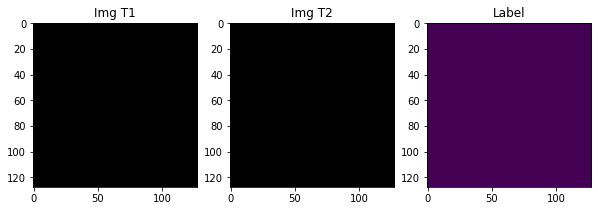

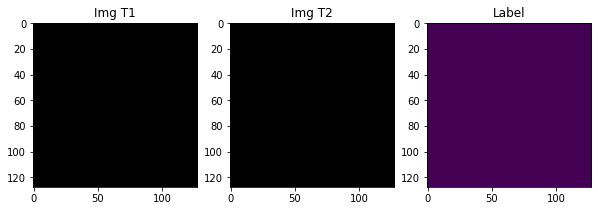

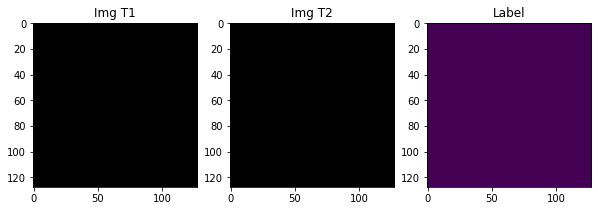

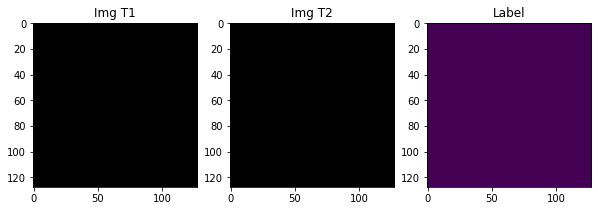

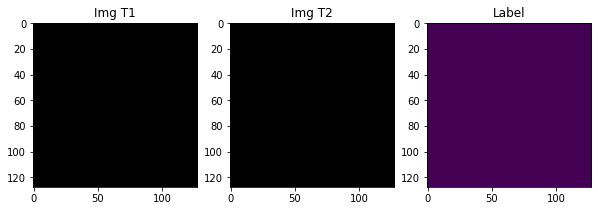

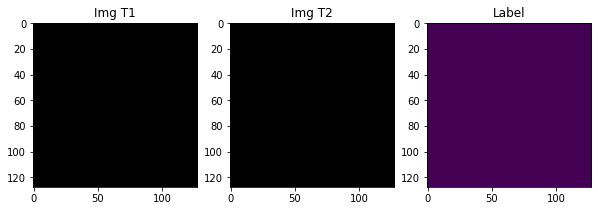

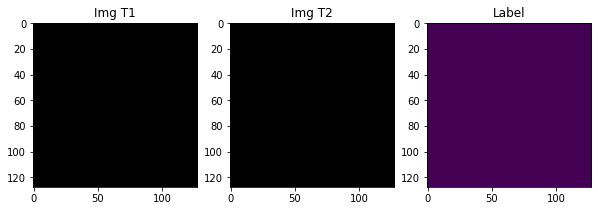

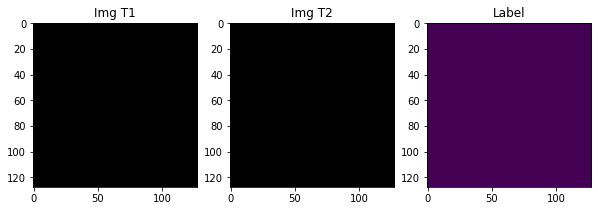

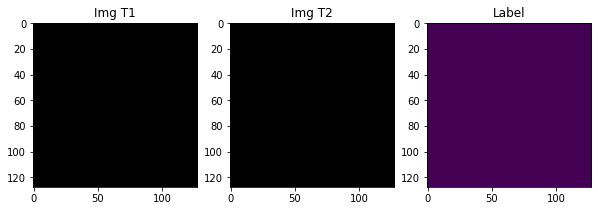

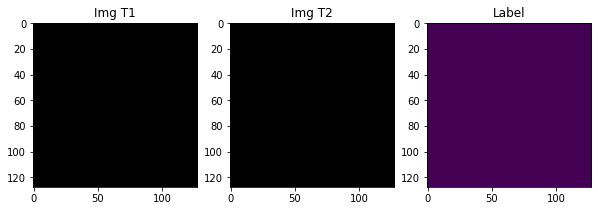

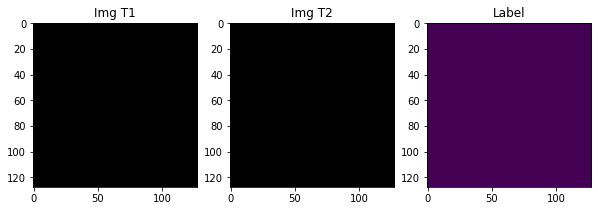

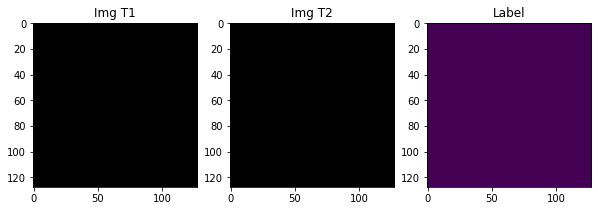

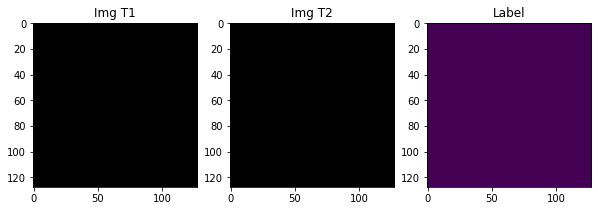

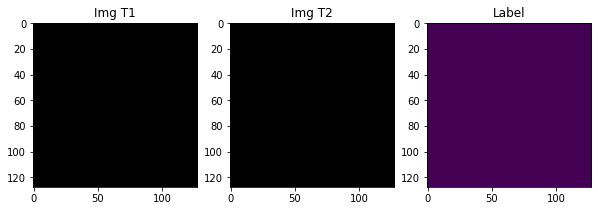

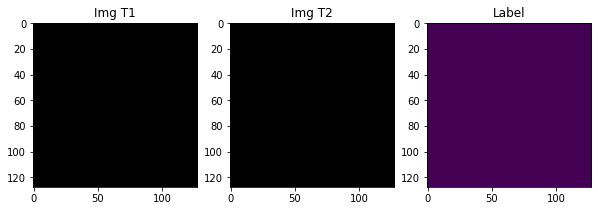

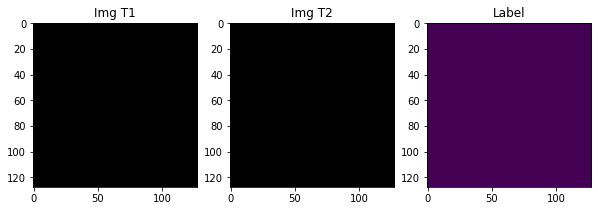

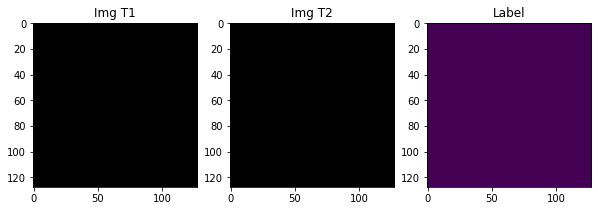

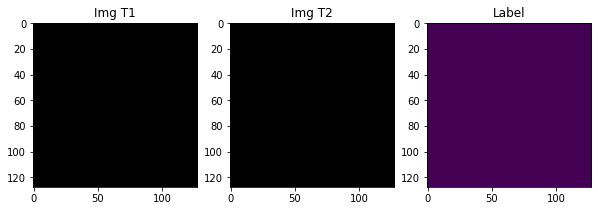

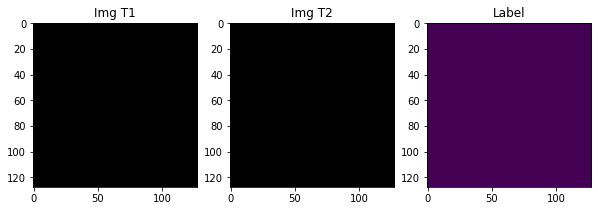

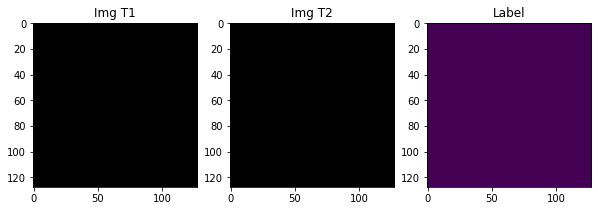

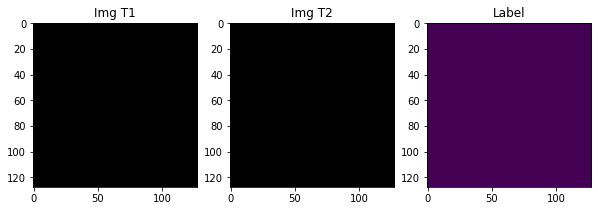

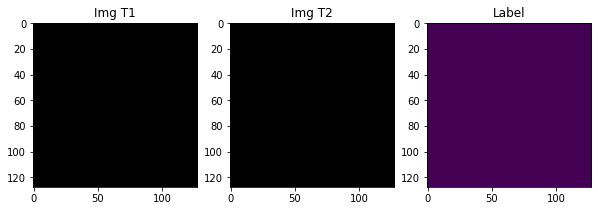

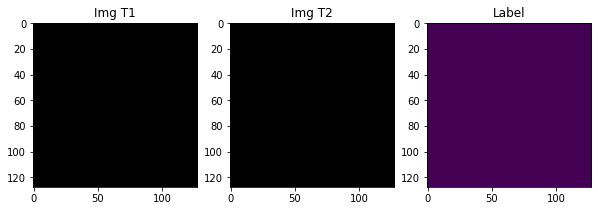

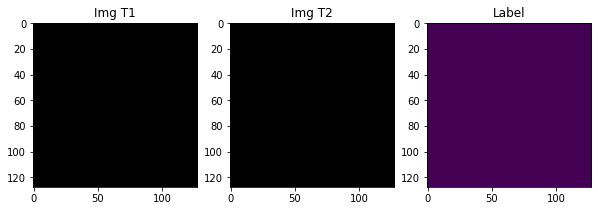

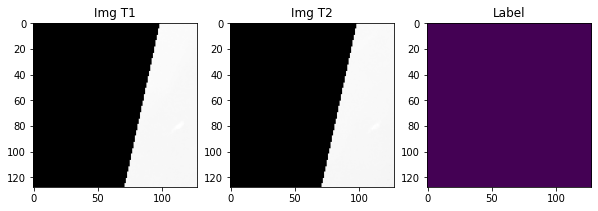

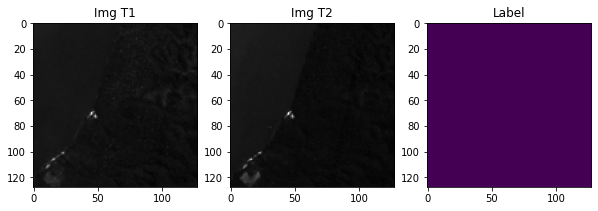

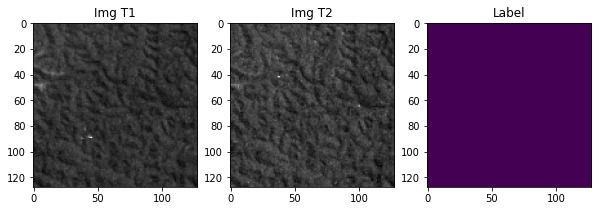

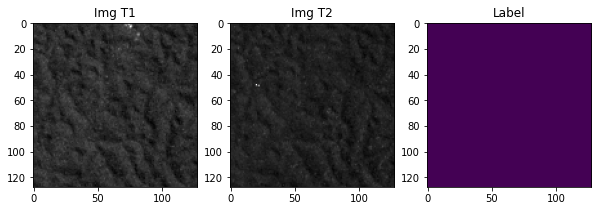

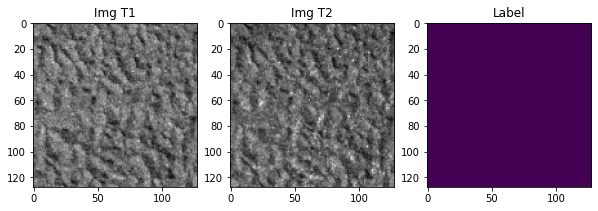

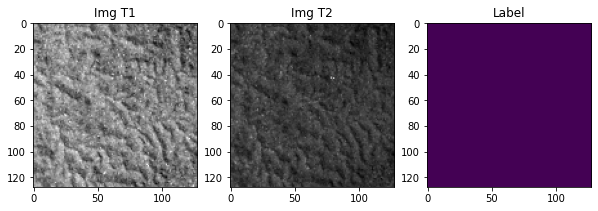

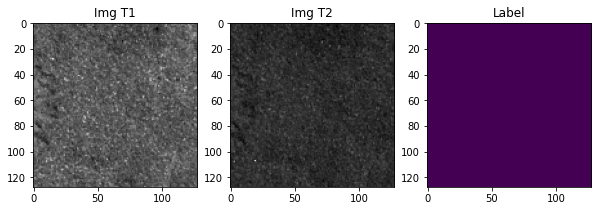

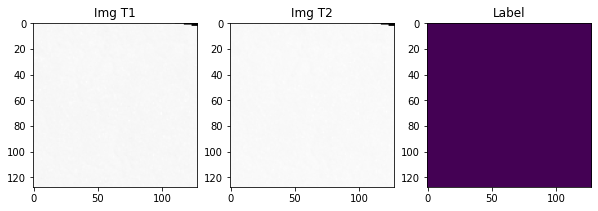

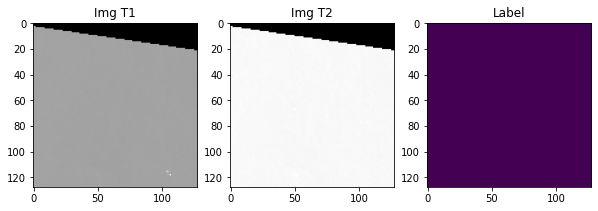

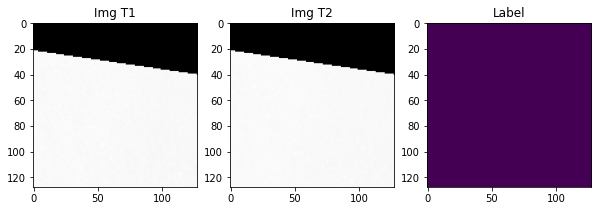

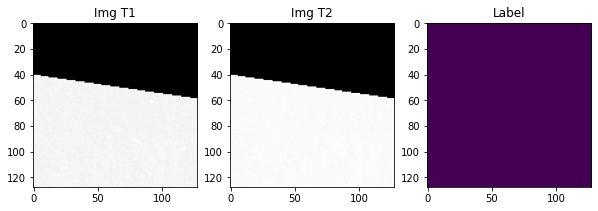

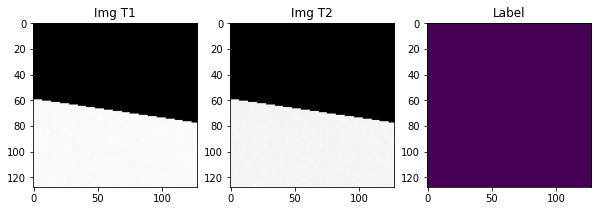

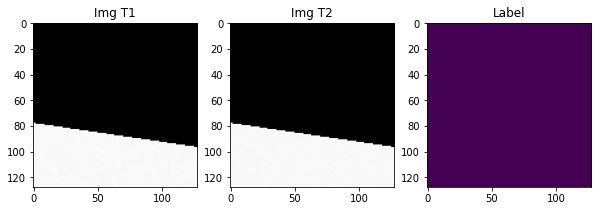

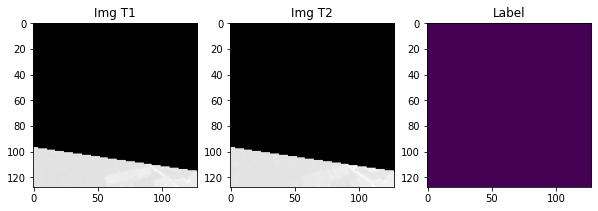

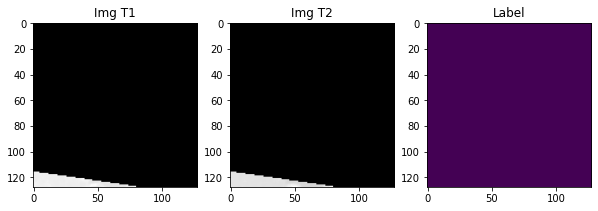

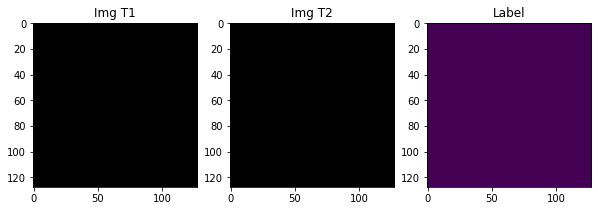

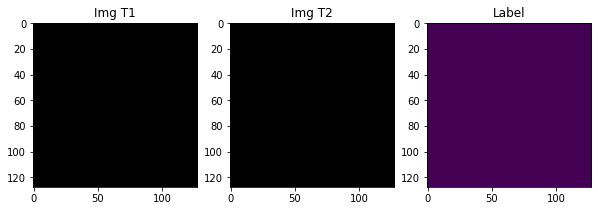

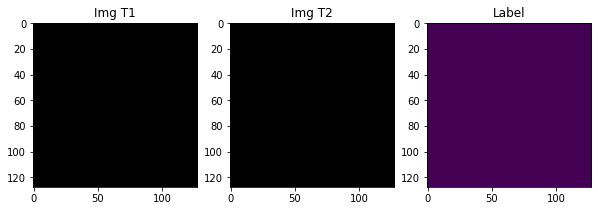

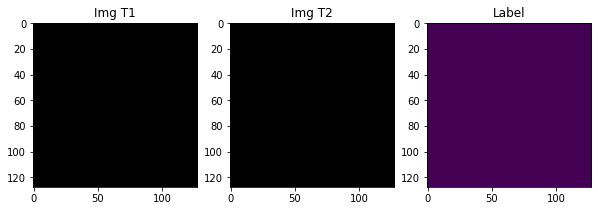

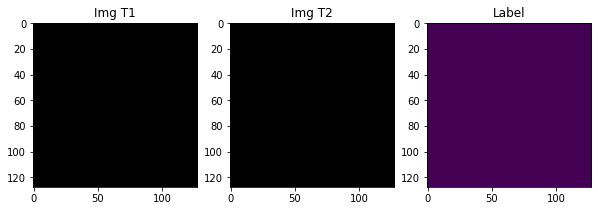

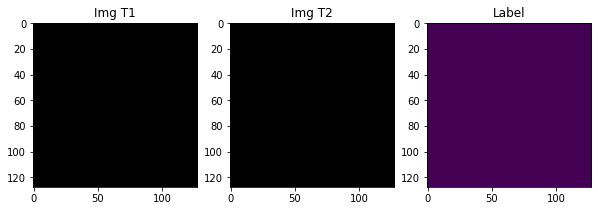

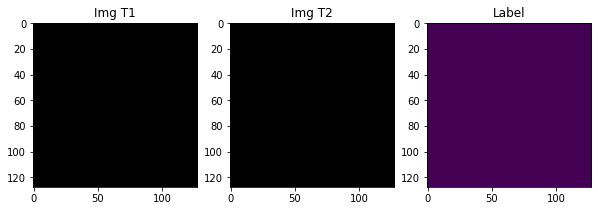

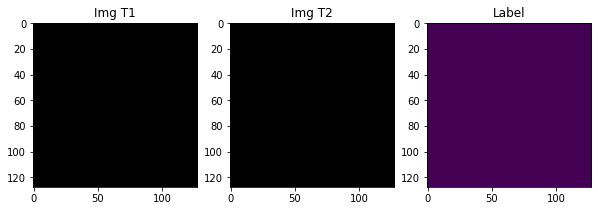

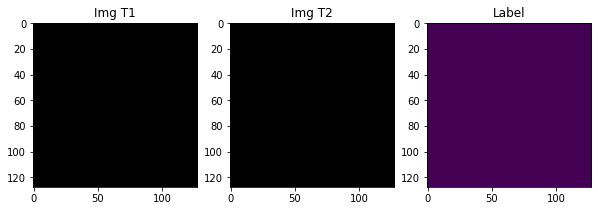

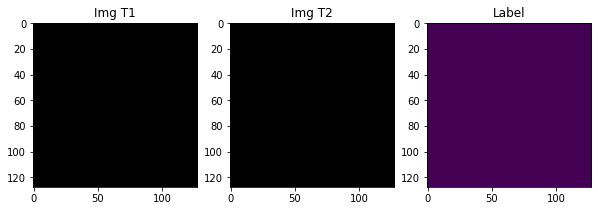

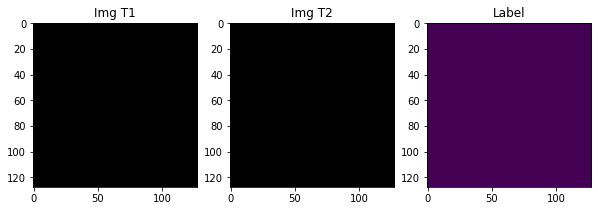

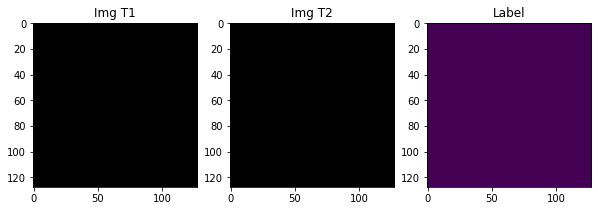

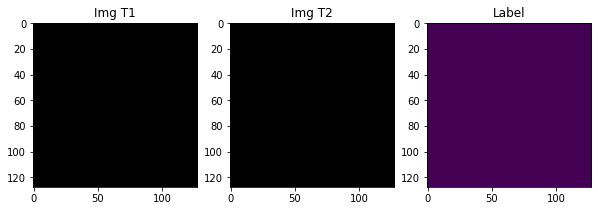

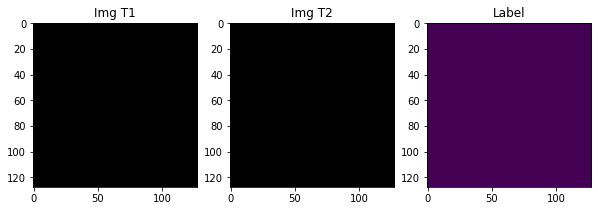

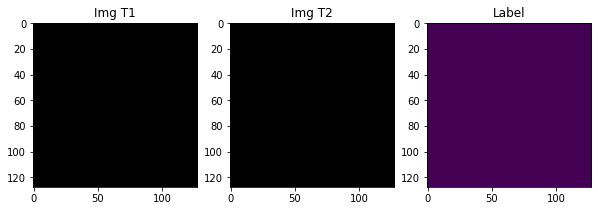

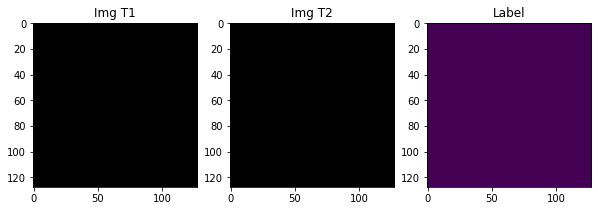

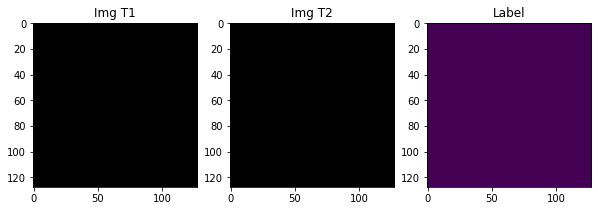

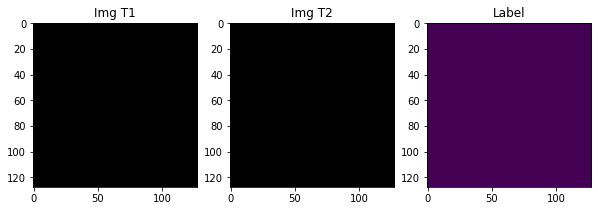

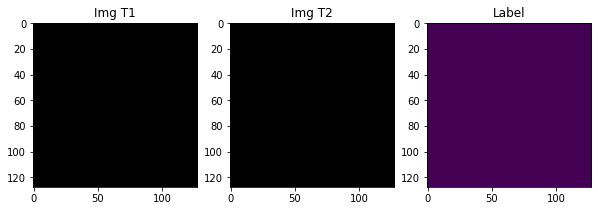

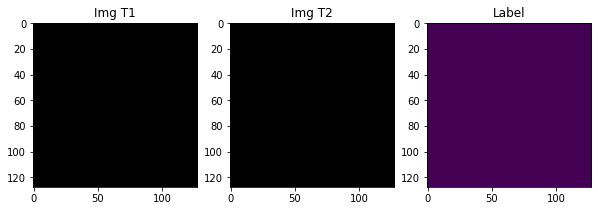

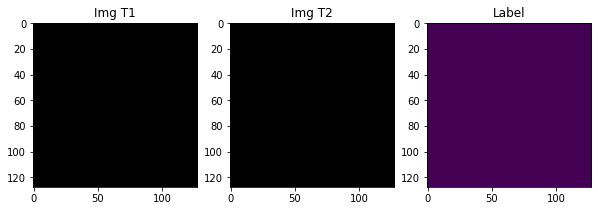

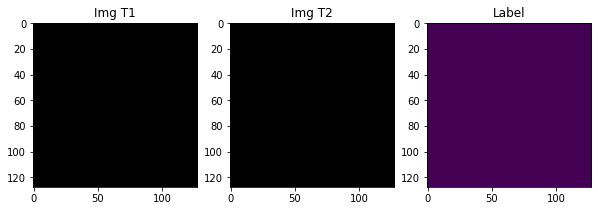

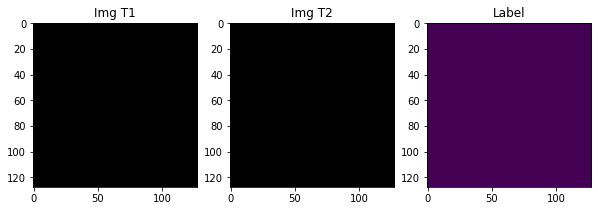

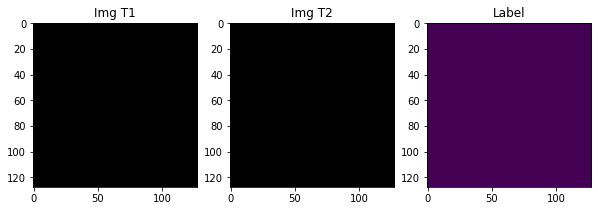

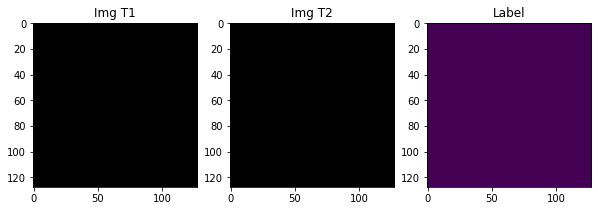

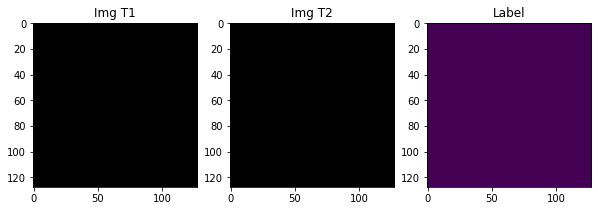

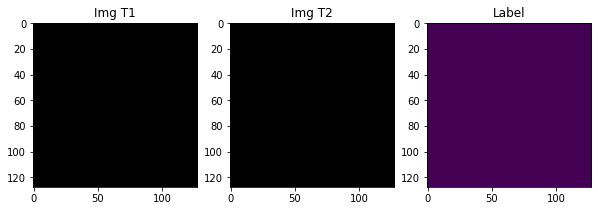

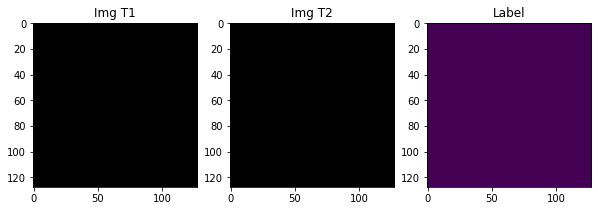

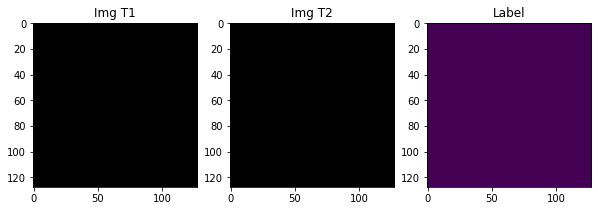

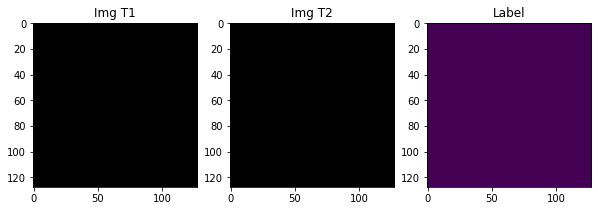

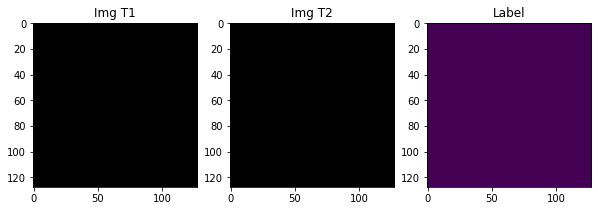

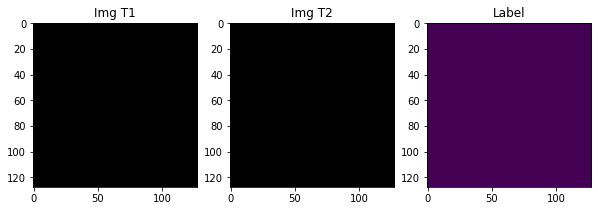

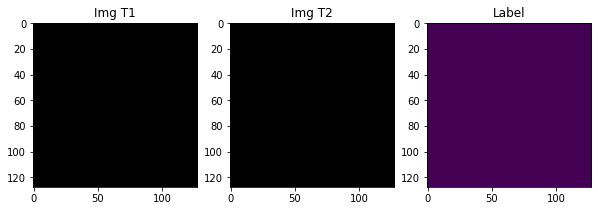

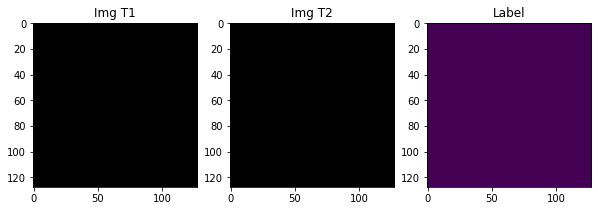

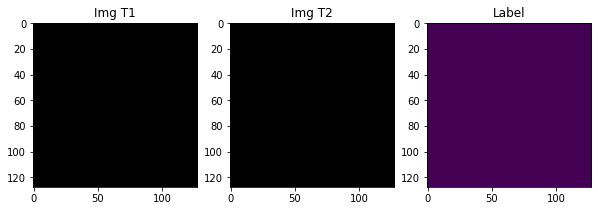

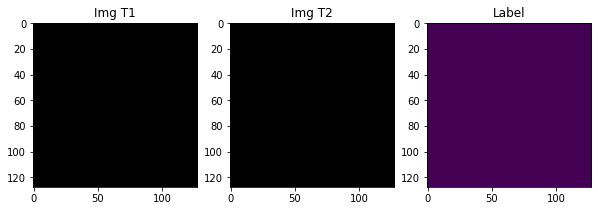

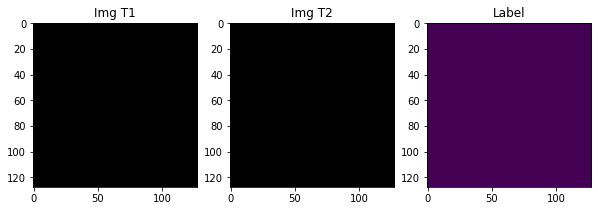

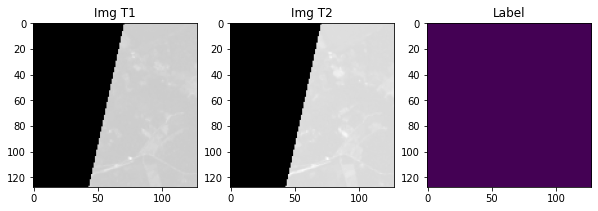

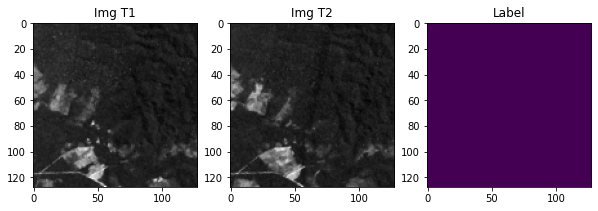

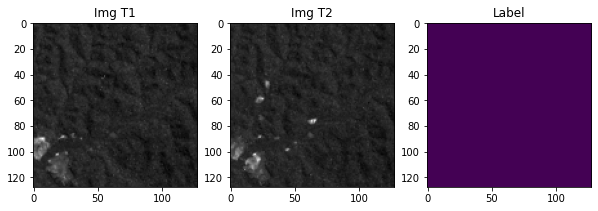

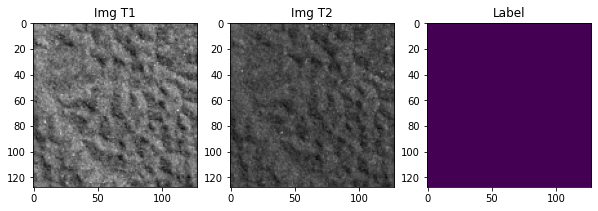

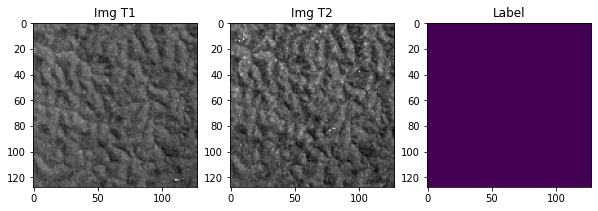

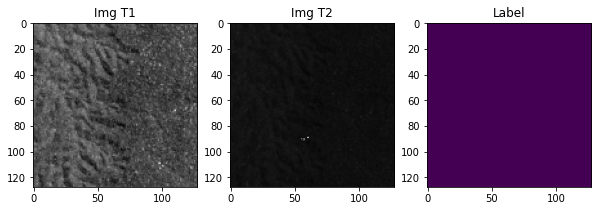

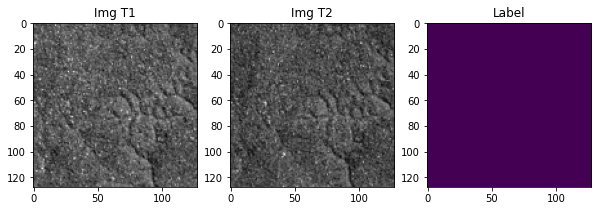

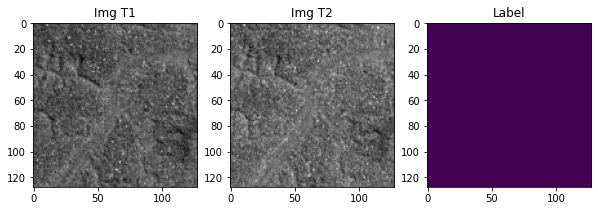

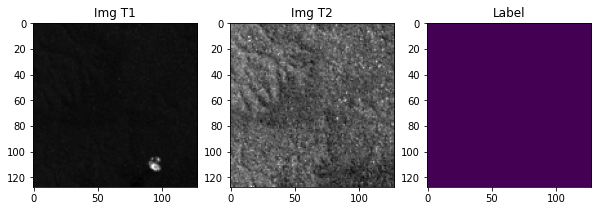

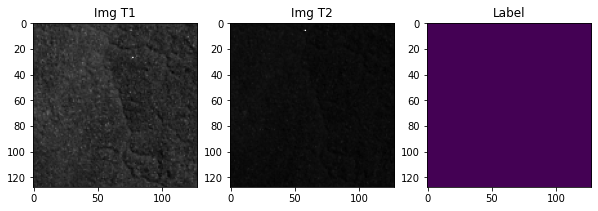

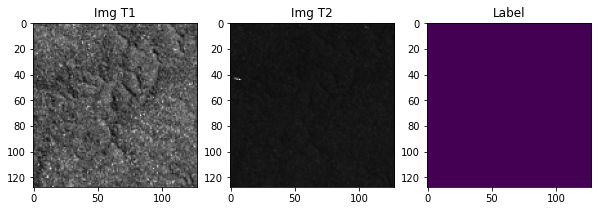

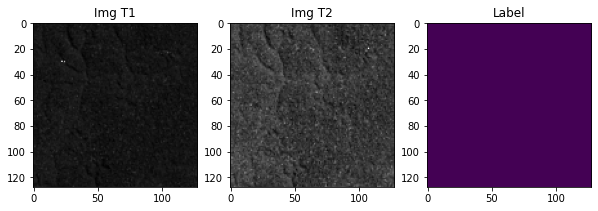

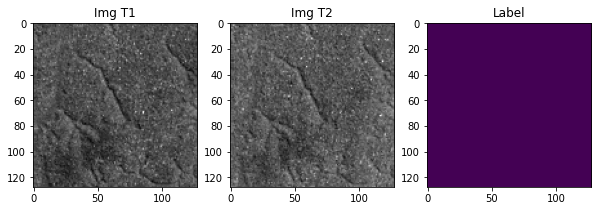

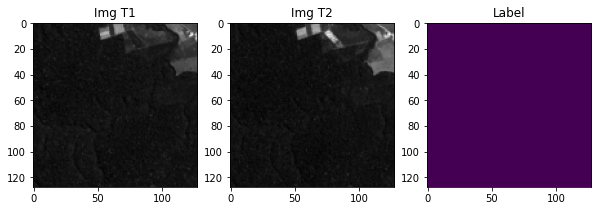

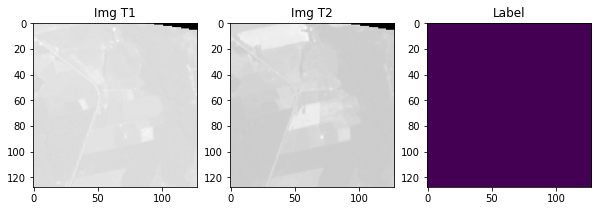

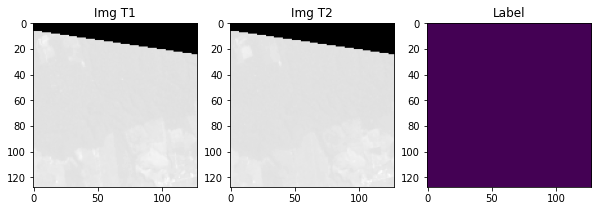

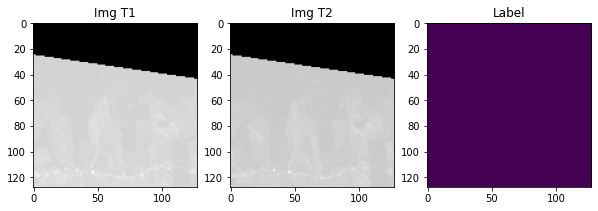

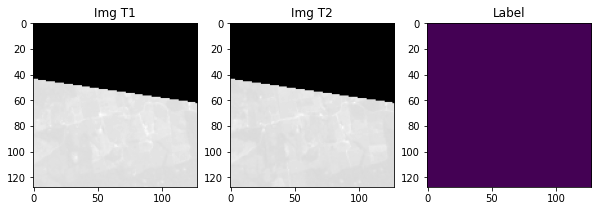

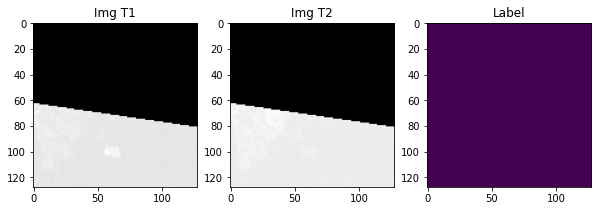

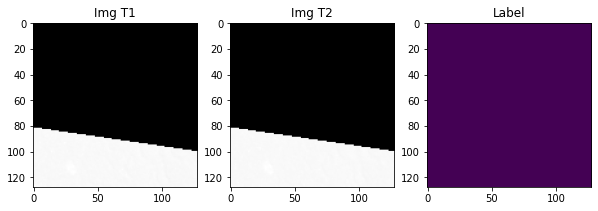

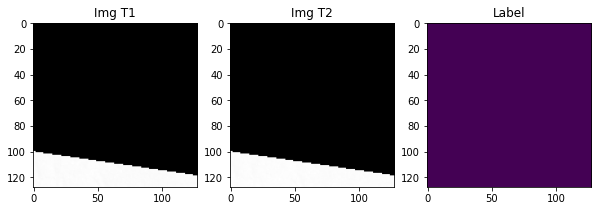

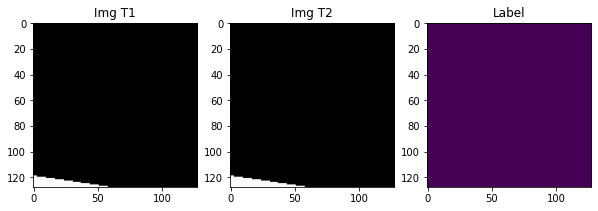

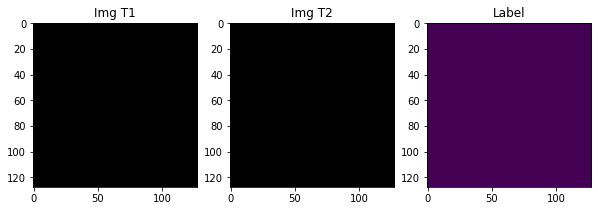

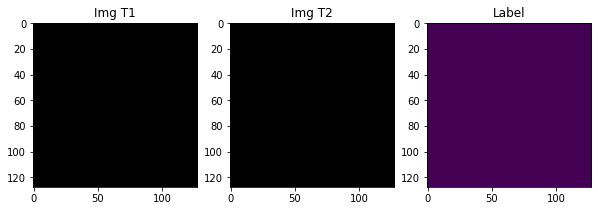

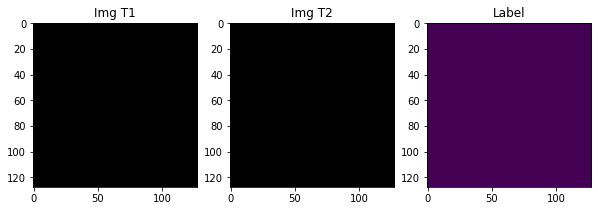

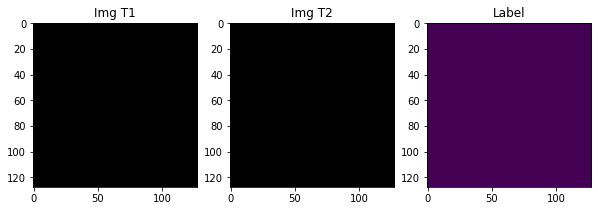

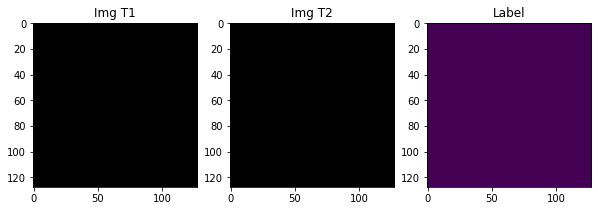

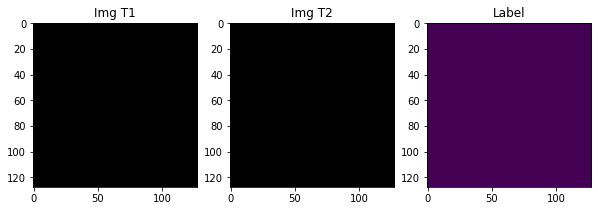

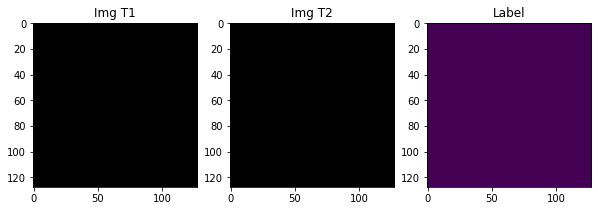

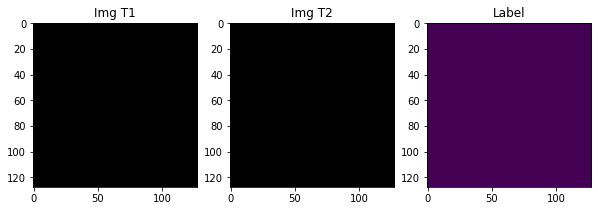

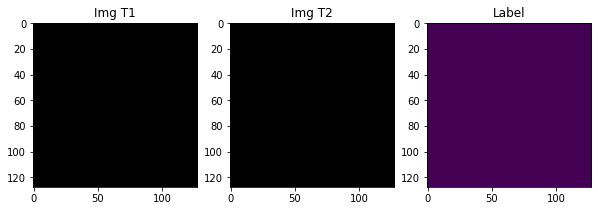

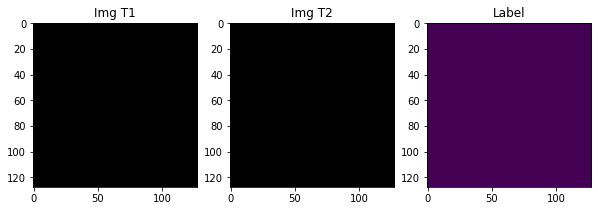

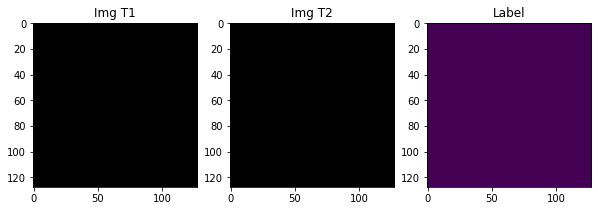

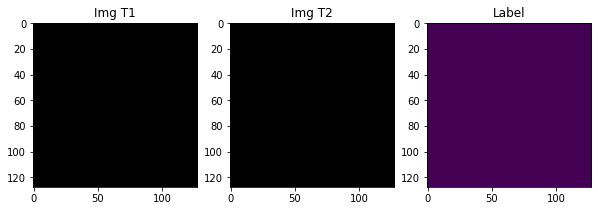

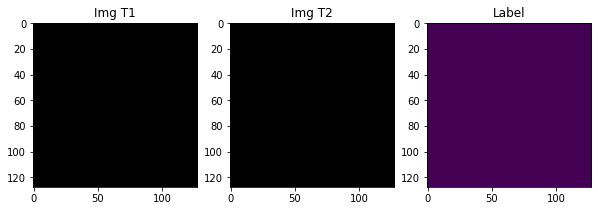

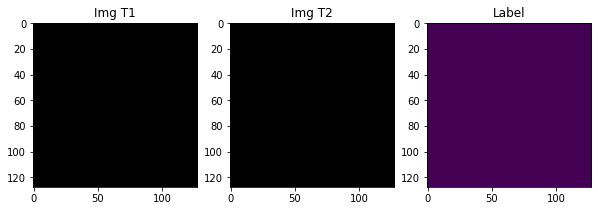

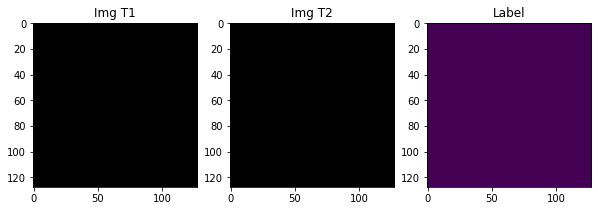

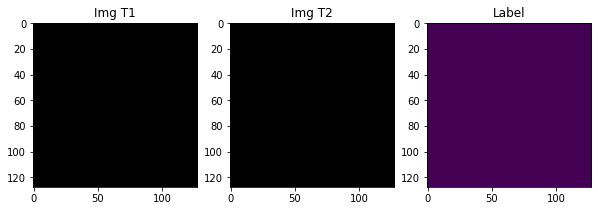

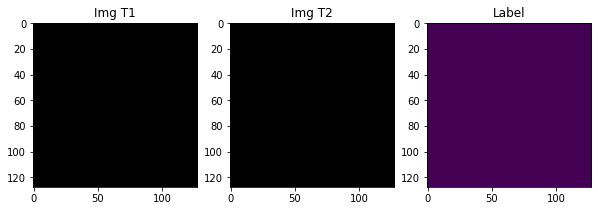

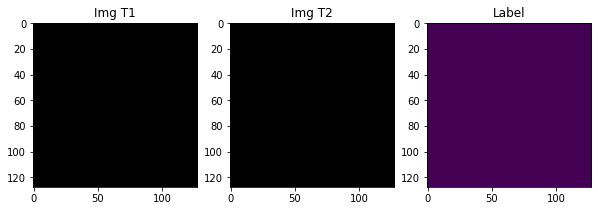

KeyboardInterrupt: 

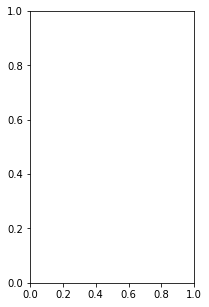

In [11]:
for i in range(len(patches_img)):
    img = patches_img[i]
    img_t1 = img[:, :, 0:7]
    img_t2 = img[:, :, 7:]
    img_t1_bgr = img_t1[:, :, 0]
    #img_t1_rgb = img_t1_bgr[:, :, ::-1].astype(np.uint8)
    img_t2_bgr = img_t2[:, :, 0]
    #img_t2_rgb = img_t2_bgr[:, :, ::-1].astype(np.uint8)
    
    img_ref = patches_ref[i]
    
    fig2, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
    ax1.set_title('Img T1')
    ax1.imshow(img_t1_bgr, cmap='gray')
    ax2.set_title('Img T2')
    ax2.imshow(img_t2_bgr, cmap='gray')
    ax3.set_title('Label')
    ax3.imshow(img_ref)

    plt.show()
    plt.close()